In [2]:
#### Step 1: Import the Libraries-

# Support Vector Machine
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

##### NumPy is an open-source Python library used to perform various mathematical and scientific tasks. 
##### NumPy is used for working with arrays. 
##### It also has functions for working in the domain of linear algebra, Fourier transform, and matrices.

##### Matplotlib is a plotting library, that is used for creating a figure, plotting area in a figure, 
##### plot some lines in a plotting area, decorates the plot with labels, etc.

##### Pandas is a tool used for data wrangling and analysis.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#### Step 2: Load the Dataset

# Importing the datasets

datasets = pd.read_csv('/content/drive/MyDrive/AbiML/Colab Notebooks1/colab datas/diabete_1.csv')


In [5]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   n_pregnant  10009 non-null  int64  
 1   glucose     10009 non-null  int64  
 2   tension     10009 non-null  int64  
 3   thickness   10009 non-null  int64  
 4   insulin     10009 non-null  int64  
 5   bmi         10009 non-null  float64
 6   pedigree    10009 non-null  float64
 7   age         10009 non-null  int64  
 8   diabete     10009 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55795c9490>,
      dtype=object)

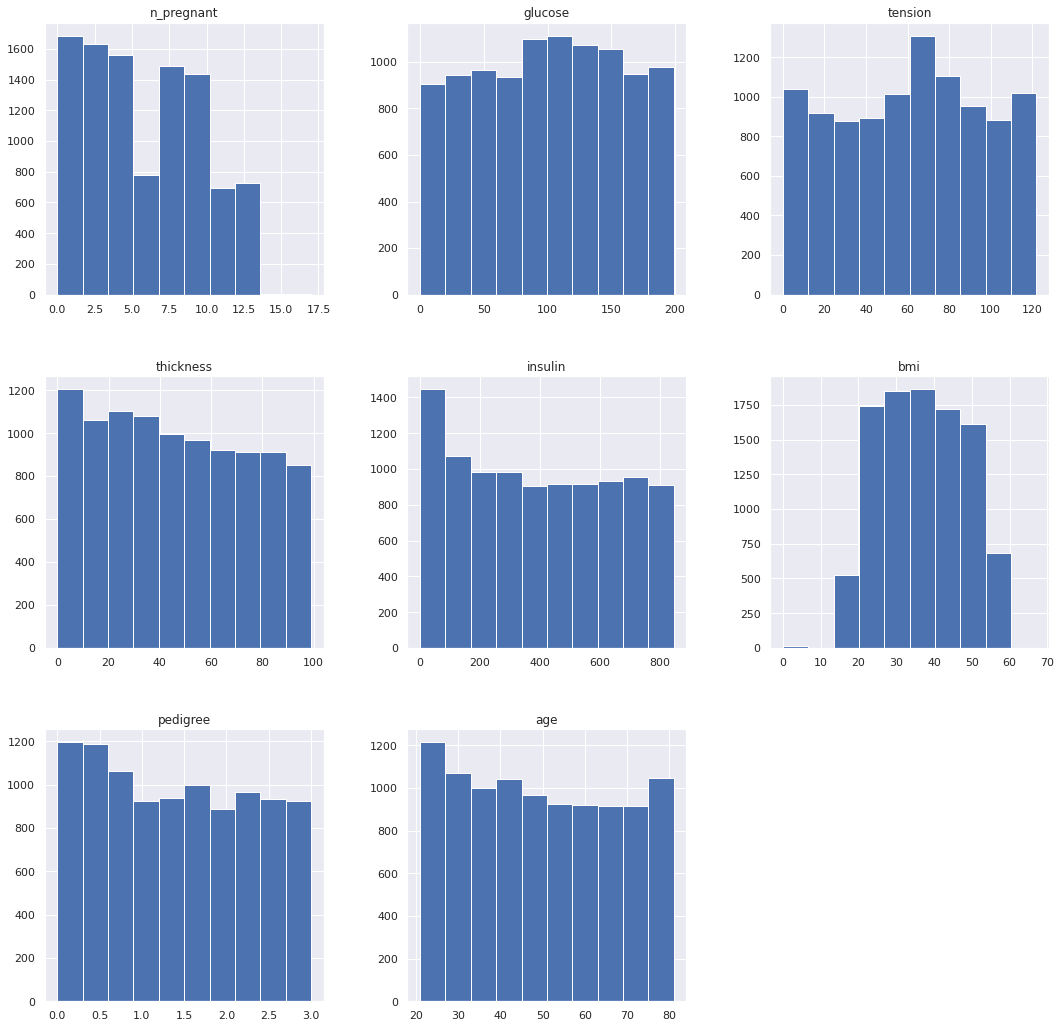

In [6]:
datasets.hist(['n_pregnant','glucose','tension','thickness','insulin','bmi','pedigree','age'],figsize=(18,18))

In [7]:
df=datasets
cols = ['n_pregnant','glucose','tension','thickness','insulin','bmi','pedigree','age'] # one or more

#print(upperbound,lowerbound)
'''Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3)
lower=Q1-(1.5*IQR)
upper=Q3-(1.5*IQR)
df[cols]=IQR
df.describe()

#df.hist(['n_pregnant','glucose','tension','thickness','insulin','bmi','pedigree','age'],figsize=(18,18))'''

"Q1 = df[cols].quantile(0.25)\nQ3 = df[cols].quantile(0.75)\nIQR = Q3 - Q1\nprint(Q1,Q3)\nlower=Q1-(1.5*IQR)\nupper=Q3-(1.5*IQR)\ndf[cols]=IQR\ndf.describe()\n\n#df.hist(['n_pregnant','glucose','tension','thickness','insulin','bmi','pedigree','age'],figsize=(18,18))"

In [8]:
# for all person glucose should be 80 - 200
#df.loc[df['glucose']<=50,'glucose']=80

In [9]:
#bp level 70  to 140
#df.loc[df['tension']<=,'tension']=60

In [10]:
#df.loc[df['thickness']<=22,'thickness']=30

In [11]:
#df.loc[df['thickness']>=160,'thickness']=120

In [12]:
#insulin level 70 -200 mIU/L...
#(SI Units*)174 pmol/L-1300
#df.loc[df['insulin']<=150,'thickness']=168

In [13]:
# min 15 to 60
#df.loc[df['bmi']<=15,'bmi']=20

In [14]:
df=datasets
#cols = ['n_pregnant','glucose','tension','thickness','insulin','bmi','pedigree','age']
'''for x in ['glucose']:
    q75,q25 = np.percentile(df,[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df['glucose'] < min,x] = np.nan
    df.loc[df['glucose'] > max,x] = np.nan'''

"for x in ['glucose']:\n    q75,q25 = np.percentile(df,[75,25])\n    intr_qr = q75-q25\n \n    max = q75+(1.5*intr_qr)\n    min = q25-(1.5*intr_qr)\n \n    df.loc[df['glucose'] < min,x] = np.nan\n    df.loc[df['glucose'] > max,x] = np.nan"

In [15]:
'''for x in ['insulin']:
    q75,q25 = np.percentile(df,[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df['insulin'] < min,x] = np.nan
    df.loc[df['insulin'] > max,x] = np.nan'''

"for x in ['insulin']:\n    q75,q25 = np.percentile(df,[75,25])\n    intr_qr = q75-q25\n \n    max = q75+(1.5*intr_qr)\n    min = q25-(1.5*intr_qr)\n \n    df.loc[df['insulin'] < min,x] = np.nan\n    df.loc[df['insulin'] > max,x] = np.nan"

In [16]:
#print(df['insulin'].isnull().sum())

In [17]:
'''for x in ['tension']:
    q75,q25 = np.percentile(df,[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df['tension'] < min,x] = np.nan
    df.loc[df['tension'] > max,x] = np.nan'''

"for x in ['tension']:\n    q75,q25 = np.percentile(df,[75,25])\n    intr_qr = q75-q25\n \n    max = q75+(1.5*intr_qr)\n    min = q25-(1.5*intr_qr)\n \n    df.loc[df['tension'] < min,x] = np.nan\n    df.loc[df['tension'] > max,x] = np.nan"

In [18]:
#print(df['tension'].isnull().sum())

In [19]:
#print(df['glucose'].isnull().sum())

In [20]:
df.isnull().sum()

n_pregnant    0
glucose       0
tension       0
thickness     0
insulin       0
bmi           0
pedigree      0
age           0
diabete       0
dtype: int64

In [21]:
#df = df.dropna(axis = 0)

In [22]:
df.isnull().sum()

n_pregnant    0
glucose       0
tension       0
thickness     0
insulin       0
bmi           0
pedigree      0
age           0
diabete       0
dtype: int64

In [23]:
df.describe()

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.00000
mean,5.779698,101.071136,61.425617,46.510541,395.780997,36.924475,1.431410,49.489959,0.48926
std,3.746878,56.443303,34.744530,28.980708,254.960753,10.981606,0.879384,17.829336,0.49991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.00000
25%,3.000000,53.000000,32.000000,22.000000,168.000000,27.700000,0.633000,34.000000,0.00000
50%,6.000000,102.000000,63.000000,45.000000,386.000000,36.630000,1.400000,49.000000,0.00000
75%,9.000000,149.000000,90.000000,71.000000,619.000000,46.260000,2.196000,65.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,3.000000,81.000000,1.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5578c89110>,
      dtype=object)

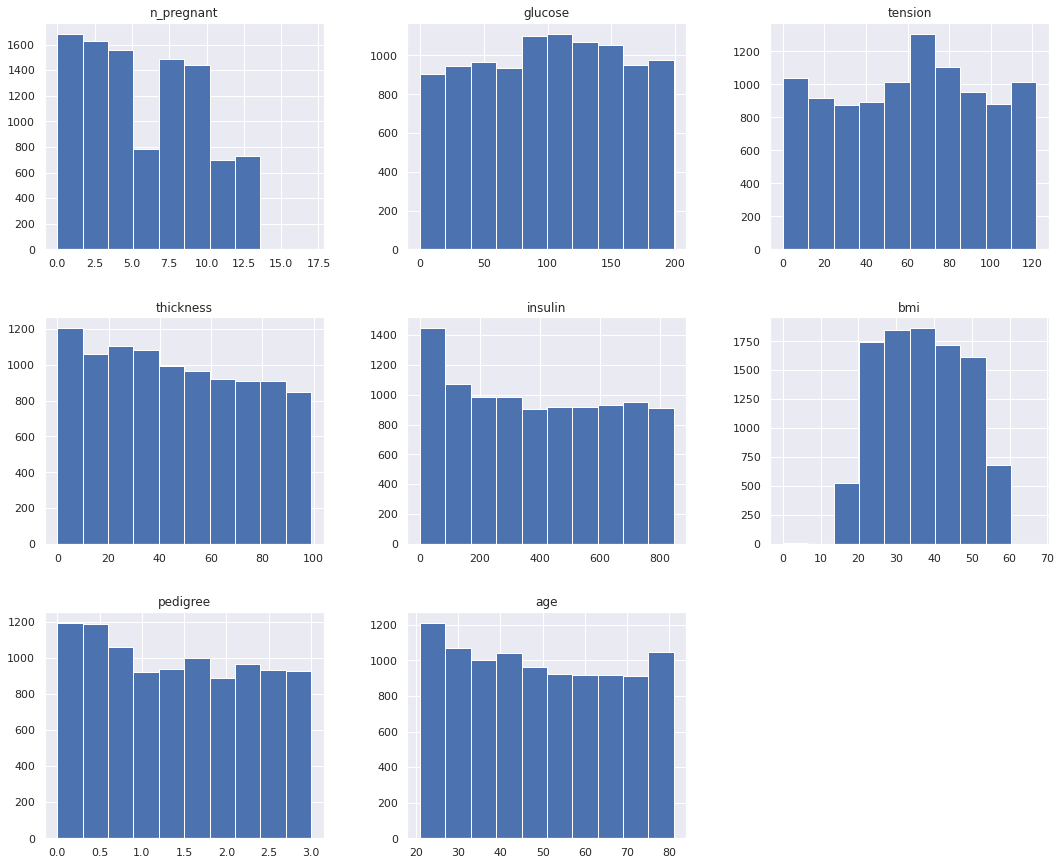

In [24]:
df.hist(['n_pregnant','glucose','tension','thickness','insulin','bmi','pedigree','age'],figsize=(18,15))

In [25]:
df.describe()

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.00000
mean,5.779698,101.071136,61.425617,46.510541,395.780997,36.924475,1.431410,49.489959,0.48926
std,3.746878,56.443303,34.744530,28.980708,254.960753,10.981606,0.879384,17.829336,0.49991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.00000
25%,3.000000,53.000000,32.000000,22.000000,168.000000,27.700000,0.633000,34.000000,0.00000
50%,6.000000,102.000000,63.000000,45.000000,386.000000,36.630000,1.400000,49.000000,0.00000
75%,9.000000,149.000000,90.000000,71.000000,619.000000,46.260000,2.196000,65.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,3.000000,81.000000,1.00000


In [26]:
import scipy.stats as stats
import pylab
def plotdata(df,features):
  plt.subplot(1,2,1)
  df[features].hist()
  plt.subplot(1,2,2)
  stats.probplot(df[features],dist='norm',plot=pylab)

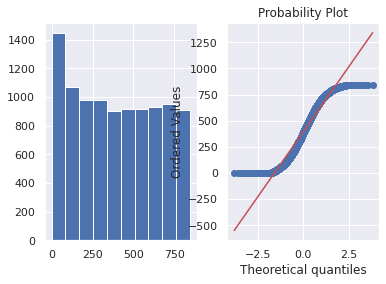

In [27]:
#no transformation

df['insulin']=df.insulin
plotdata(df,'insulin')

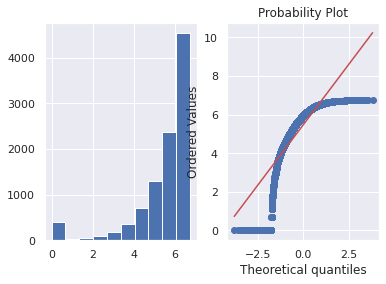

In [28]:
df1=df
#logarthmic Transformation
df1['insulin_log']=np.log1p(df1['insulin'])
plotdata(df1,'insulin_log')

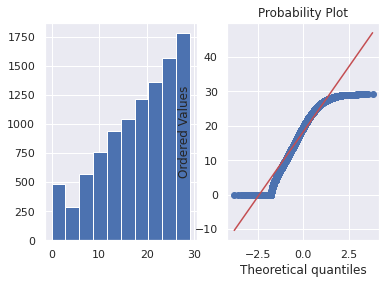

In [29]:
#Square root
df1['insulin_squ']=df1.insulin**(1/2)
plotdata(df1,'insulin_squ')

In [30]:
#### independent variables n_pregnant, glucose, tension, thickness, insulin , bmi, pedigree, age
#### One dependent variable that Patient is Diabetic or not. 
#### 1 means Diabetic
#### 0 means not Diabetic

In [31]:
#### Model Preparation
#### our model has to classify whether a patient is daibetic or not based on the Patients other details.

In [32]:
#### In the next step, I will remove these two variables and split the dataset into X and Y.
#### Here X represents independent variables and Y represents dependent variables.

In [33]:
#### Step 3: Split Dataset into X and Y

X1 = df.iloc[:, [0,1,2,3,4,5,6,7]].values 
Y1 = df.iloc[:, 8].values


In [34]:
listcols = pd.DataFrame({ 'colnum':[0,1,2,3,4,5,6,7],'Columns':['n_pregnant','glucose','tension','thickness','insulin','bmi','pedigree','age']})
print(listcols)

   colnum     Columns
0       0  n_pregnant
1       1     glucose
2       2     tension
3       3   thickness
4       4     insulin
5       5         bmi
6       6    pedigree
7       7         age


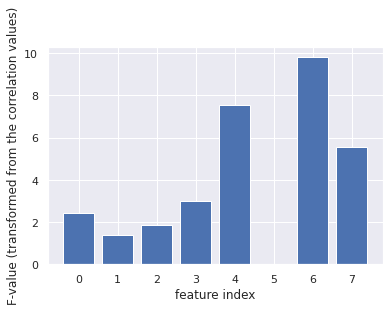

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
#from sklearn.feature_selection import chi2
# feature selection

f_selector = SelectKBest(score_func=f_regression, k='all')
# Plot the scores for the features
f_selector.fit(X1,Y1)

plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")

plt.ylabel("F-value (transformed from the correlation values)")
plt.show()


In [36]:
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values 
Y = df.iloc[:, 8].values

In [37]:

classes = {0:'Non-Diabetic', 1:'Diabetic'}
classes_names = ['Non-Diabetic', 'Diabetic']
print(df.diabete.value_counts().rename(index = classes))

Non-Diabetic    5112
Diabetic        4897
Name: diabete, dtype: int64


In [38]:
x = X

In [39]:
x

array([[0.000e+00, 7.800e+01, 5.200e+01, ..., 2.510e+01, 7.800e-02,
        2.100e+01],
       [2.000e+00, 1.070e+02, 6.200e+01, ..., 2.520e+01, 1.280e-01,
        2.100e+01],
       [3.000e+00, 1.140e+02, 6.200e+01, ..., 2.260e+01, 1.420e-01,
        2.100e+01],
       ...,
       [1.000e+00, 1.100e+01, 1.010e+02, ..., 2.544e+01, 2.935e+00,
        5.700e+01],
       [9.000e+00, 1.950e+02, 6.200e+01, ..., 3.575e+01, 1.733e+00,
        4.200e+01],
       [5.000e+00, 3.600e+01, 4.200e+01, ..., 4.750e+01, 2.516e+00,
        3.300e+01]])

In [40]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
#### Step 4: Split the X and Y Dataset into the Training set and Test set

#### For any machine learning model, we need to train our model on the training set first. 
#### Once the data is trained checking the performance of our model, we use a Test set. 
#### This is the reason why we have to split the X and Y datasets into the Training set and Test set.

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 0)



#### train_test_split selects randomly the train and test size basing on the ratio given. 
#### Every single time you run this function you will have a randomly selected train and test values based on the train 
#### and test size ratio. 
#### This random selection every particular time you run this results in the "random_states". 
#### To avoid getting different values for train and test every time we select the random_state you want to use. 


In [42]:
#### In the Dataset all values are not in the same range. 
#### It requires a lot of time for calculation. 
#### To overcome this problem, we perform feature scaling.

#### Feature scaling help us to normalize the data within a particular range.

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [43]:
x= X_Train[10:]

In [44]:
x

array([[-0.47256771,  0.47889725,  0.24668223, ...,  0.69874601,
        -0.60030698, -1.32410221],
       [ 0.06316196, -0.60847074,  0.96624909, ..., -0.5075468 ,
         0.24211285,  0.81003844],
       [ 1.67035098, -0.00239678, -0.01236184, ..., -1.48480823,
         0.91536289, -0.87480945],
       ...,
       [-0.20470287, -0.37673658, -0.18505789, ...,  0.37481715,
        -1.13182017,  0.30458407],
       [ 1.40248614, -0.25195664, -0.01236184, ...,  1.08381074,
         1.24112903,  0.97852322],
       [-0.20470287,  0.51454866,  1.59946793, ...,  0.69327116,
        -1.02666057,  0.81003844]])

In [45]:
#### Step 5 Fit SVM to the Training set Using Linear
#### This SVC class allows us to build a kernel SVM model (linear as well as non-linear),

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [46]:
acc_Train_SVC = round(classifier.score(X_Train, Y_Train)  * 100, 2)
acc_Train_SVC

52.11

In [47]:
#### Predicting the test set results
#### The classifier.fit(X_train, y_train) fit the SVM algorithm to the training set- X_train and y_train.
#### Predict the Test Results

Y_Pred = classifier.predict(X_Test)

In [48]:
###### Step 7: Make the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
acc_Test_SVC= accuracy_score(Y_Test,Y_Pred)
acc_Test_SVC

[[856 691]
 [817 639]]


0.49783549783549785

In [49]:


#### This example is for the RBF Kernel

In [50]:
#### Step 5 Fit SVM to the Training set Using RBF
#### This SVC class allows us to build a kernel SVM model (linear as well as non-linear),

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(random_state=0)

In [51]:
acc_Train_RBF = round(classifier.score(X_Train, Y_Train)  * 100, 2)
acc_Train_RBF

61.29

In [52]:
#### Predicting the test set results
#### The classifier.fit(X_train, y_train) fit the SVM algorithm to the training set- X_train and y_train.
#### Predict the Test Results

Y_Pred = classifier.predict(X_Test)

In [53]:
y = Y_Pred

In [54]:
###### Step 7: Make the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
acc_Test_RBF= accuracy_score(Y_Test,Y_Pred)
acc_Test_RBF

[[782 765]
 [696 760]]


0.5134865134865135

In [55]:
##### KNN Model to be Explained

In [56]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)  
classifier.fit(X_Train, Y_Train) 

KNeighborsClassifier(p=3)

In [57]:
Acc_Train_Knn = round(classifier.score(X_Train, Y_Train)  * 100, 2)
Acc_Train_Knn

69.7

In [58]:
#Predicting the test set result  
ACC_Test_knn = classifier.predict(X_Test)  

In [59]:
ACC_Test_knn

array([1, 1, 0, ..., 1, 1, 0])

In [60]:
##### Creating the Confusion Matrix for KNN 

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

acc_Test_knn= accuracy_score(Y_Test,Y_Pred)
acc_Test_knn



[[782 765]
 [696 760]]


0.5134865134865135

In [62]:
#### Naive Bayes 

In [63]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_Train, Y_Train)  

GaussianNB()

In [64]:
Acc_Train_Naive = round(classifier.score(X_Train, Y_Train)  * 100, 2)
Acc_Train_Naive

51.73

In [65]:
# Predicting the Test set results  
Y_pred = classifier.predict(X_Test)  

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

acc_Test_Naive= accuracy_score(Y_Test,Y_Pred)
acc_Test_Naive


[[782 765]
 [696 760]]


0.5134865134865135

In [67]:
##### Decision Tree Algorithm

In [68]:
####Fitting Decision Tree classifier to the training set  

from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_Train, Y_Train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [69]:
Acc_Train_Decision = round(classifier.score(X_Train, Y_Train)  * 100, 2)
Acc_Train_Decision

100.0

In [70]:
#Predicting the test set result  
Y_Pred= classifier.predict(X_Test)  

In [71]:
###### Step 7: Make the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score
Decision_Tree_cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

acc_Test_Decision= accuracy_score(Y_Test,Y_Pred)
acc_Test_Decision

[[782 765]
 [696 760]]


0.5138195138195139

In [72]:
###### Random Forest Model

In [73]:
#Fitting Random Forest classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_Train, Y_Train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [74]:
#Predicting the test set result  
Y_Pred= classifier.predict(X_Test)  

In [75]:
Acc_Train_Random = round(classifier.score(X_Train, Y_Train)  * 100, 2)
Acc_Train_Random

98.04

In [76]:
###### Step 7: Make the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score


Random_Tree_cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
acc_Test_Random= accuracy_score(Y_Test,Y_Pred)
acc_Test_Random

[[782 765]
 [696 760]]


0.5141525141525142

In [77]:
######### Model Evaluation

In [78]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Ploynomial SVC', 'k-Nearest Neighbors', 'Naive Bayes', 
              'Decision Tree Classifier', 'Random Forest'],
    
    'Score_train': [acc_Train_SVC, acc_Train_RBF,Acc_Train_Knn, Acc_Train_Naive,
              Acc_Train_Decision, Acc_Train_Random],
    'Score_test': [acc_Test_SVC, acc_Test_RBF,acc_Test_knn, acc_Test_Naive,
              acc_Test_Decision, acc_Test_Random]
                    })

In [79]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
4,Decision Tree Classifier,100.00,0.513820
5,Random Forest,98.04,0.514153
2,k-Nearest Neighbors,69.70,0.513487
1,Ploynomial SVC,61.29,0.513487
0,Support Vector Machines,52.11,0.497835
3,Naive Bayes,51.73,0.513487


In [80]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test
5,Random Forest,98.04,0.514153
4,Decision Tree Classifier,100.00,0.513820
2,k-Nearest Neighbors,69.70,0.513487
1,Ploynomial SVC,61.29,0.513487
3,Naive Bayes,51.73,0.513487
0,Support Vector Machines,52.11,0.497835


In [81]:
#Confusion Matrix for All Models

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score
SVC_cm = confusion_matrix(Y_Test, Y_Pred)
print('\n Scalar Vector Linear Confusion Matrix: \n' , SVC_cm)
acc_Test_SVC= accuracy_score(Y_Test,Y_Pred)
print('\n Scalar Vector Linear Accuracy: \n' , acc_Test_SVC)


SVC_RBF_cm = confusion_matrix(Y_Test, Y_Pred)
print('\n Scalar Vector RBF Confusion Matrix: \n' , SVC_RBF_cm)
acc_Test_RBF= accuracy_score(Y_Test,Y_Pred)
print('\n Scalar Vector RBF Accuracy: \n' , acc_Test_RBF)


KNN_cm = confusion_matrix(Y_Test, Y_Pred)
print('\n K Nearest Neighbour Confusion Matrix: \n' , KNN_cm)

acc_Test_knn= accuracy_score(Y_Test,Y_Pred)
print('\n K Nearest Neighbour Accuracy: \n' , acc_Test_knn)



Naive_cm = confusion_matrix(Y_Test, Y_Pred)
print('\n Naive Bayes Confusion Matrix: \n' , Naive_cm)

acc_Test_Naive= accuracy_score(Y_Test,Y_Pred)
print('\n Naive Bayes Accuracy: \n' , acc_Test_Naive)



Decision_Tree_cm = confusion_matrix(Y_Test, Y_Pred)
print('\n Decision Tree Confusion Matrix: \n' , cm)

acc_Test_Decision= accuracy_score(Y_Test,Y_Pred)
print('\n Decision Tree Accuracy: ' , acc_Test_Decision )


Random_Tree_cm = confusion_matrix(Y_Test, Y_Pred)
print('\n Random Forest Tree Confusion Matrix: \n' , cm)
acc_Test_Random= accuracy_score(Y_Test,Y_Pred)
print('\n Random Forest Tree Confusion Matrix: ' , acc_Test_Random)



 Scalar Vector Linear Confusion Matrix: 
 [[986 561]
 [898 558]]

 Scalar Vector Linear Accuracy: 
 0.5141525141525142

 Scalar Vector RBF Confusion Matrix: 
 [[986 561]
 [898 558]]

 Scalar Vector RBF Accuracy: 
 0.5141525141525142

 K Nearest Neighbour Confusion Matrix: 
 [[986 561]
 [898 558]]

 K Nearest Neighbour Accuracy: 
 0.5141525141525142

 Naive Bayes Confusion Matrix: 
 [[986 561]
 [898 558]]

 Naive Bayes Accuracy: 
 0.5141525141525142

 Decision Tree Confusion Matrix: 
 [[782 765]
 [696 760]]

 Decision Tree Accuracy:  0.5141525141525142

 Random Forest Tree Confusion Matrix: 
 [[782 765]
 [696 760]]

 Random Forest Tree Confusion Matrix:  0.5141525141525142


In [83]:
#Different Approach

Decision Tree Train Score:  55.25
Decision Tree Test Score:  50.28


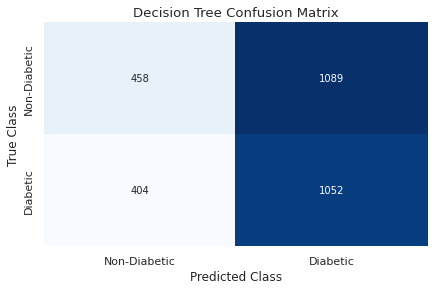

In [84]:
#Decision Tree Model
DecisionTreeModel = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=33) #criterion can be entropy
DecisionTreeModel.fit(X_Train, Y_Train)
DecisionTreeModel_Y_Pred = DecisionTreeModel.predict(X_Test)


#Score
DecisionTreeModel_TrainScore =  round(DecisionTreeModel.score(X_Train, Y_Train) * 100, 2)
DecisionTreeModel_TestScore = round(DecisionTreeModel.score(X_Test, Y_Test) * 100, 2)

print('Decision Tree Train Score: ' , DecisionTreeModel_TrainScore)
print('Decision Tree Test Score: ' , DecisionTreeModel_TestScore)


#Confusion Matrix
DecisionTreeModel_CM = confusion_matrix(Y_Test, DecisionTreeModel_Y_Pred)
DecisionTreeModel_ConfusionMatrix = pd.DataFrame(DecisionTreeModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(DecisionTreeModel_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
sns.set(font_scale=1.1)
plt.title("Decision Tree Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

RandomForestModel Train Score:  62.95
RandomForestModel Test Score:  50.18


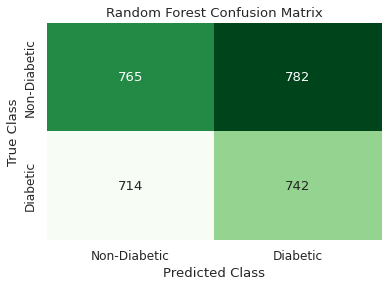

In [85]:
#Random Forest Model
RandomForestModel = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)
RandomForestModel.fit(X_Train, Y_Train)
RandomForestModel_Y_Pred = RandomForestModel.predict(X_Test)


#Score
RandomForestModel_TrainScore =  round(RandomForestModel.score(X_Train, Y_Train) * 100, 2)
RandomForestModel_TestScore = round(RandomForestModel.score(X_Test, Y_Test) * 100, 2)

print('RandomForestModel Train Score: ' , RandomForestModel_TrainScore)
print('RandomForestModel Test Score: ' , RandomForestModel_TestScore)


#Confusion Matrix
RandomForestModel_CM = confusion_matrix(Y_Test, RandomForestModel_Y_Pred)
RandomForestModel_ConfusionMatrix = pd.DataFrame(RandomForestModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(RandomForestModel_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
sns.set(font_scale=1.1)
plt.title("Random Forest Confusion Matrix")
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

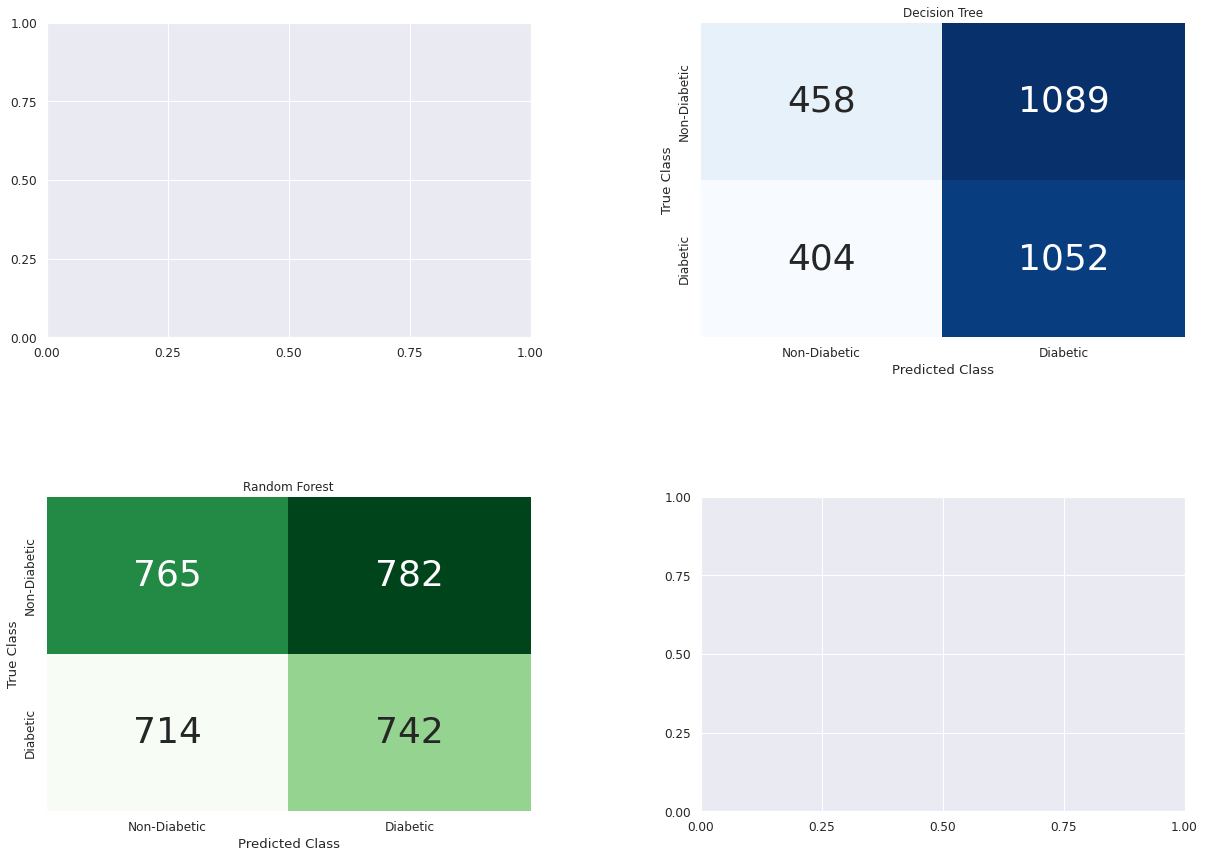

In [86]:
fig, ax = plt.subplots(2, 2,figsize=(20,15))
fig.tight_layout(pad=10.0)
sns.set(font_scale=3)

sns.heatmap(DecisionTreeModel_ConfusionMatrix, ax=ax[0][1], annot=True, cbar=None, cmap="Blues", fmt = 'g')
ax[0][1].set_title("Decision Tree", fontsize=12)
ax[0][1].set_ylabel("True Class"), ax[0][1].set_xlabel("Predicted Class")


sns.heatmap(RandomForestModel_ConfusionMatrix, ax=ax[1][0], annot=True, cbar=None, cmap="Greens", fmt = 'g')
ax[1][0].set_title("Random Forest", fontsize=12),
ax[1][0].set_ylabel("True Class"), ax[1][0].set_xlabel("Predicted Class")

plt.show()

In [87]:
'''TP = True Positives = 
TN = True Negatives = 
FP = False Positives = 
FN = False Negatives = 


True Positive
True positive is nothing but the case where the actual value as well as the predicted value are true. 
The patient has been diagnosed with diabetes, and the model also predicted that the patient had diabetes.


False Negative
In false negative, the actual value is true, but the predicted value is false,
which means that the patient has diabetes, but the model predicted that the patient did not have diabetes.


False Positive
This is the case where the predicted value is true, but the actual value is false. Here, 
the model predicted that the patient had diabetes, but in reality, the patient doesn’t have diabetes. 
This is also known as Type 1 Error.

True Negative
This is the case where the actual value is false and the predicted value is also false. 
patient is not diagnosed with diabetes and our model predicted that the patient did not have diabetes.'''


'TP = True Positives = \nTN = True Negatives = \nFP = False Positives = \nFN = False Negatives = \n\n\nTrue Positive\nTrue positive is nothing but the case where the actual value as well as the predicted value are true. \nThe patient has been diagnosed with diabetes, and the model also predicted that the patient had diabetes.\n\n\nFalse Negative\nIn false negative, the actual value is true, but the predicted value is false,\nwhich means that the patient has diabetes, but the model predicted that the patient did not have diabetes.\n\n\nFalse Positive\nThis is the case where the predicted value is true, but the actual value is false. Here, \nthe model predicted that the patient had diabetes, but in reality, the patient doesn’t have diabetes. \nThis is also known as Type 1 Error.\n\nTrue Negative\nThis is the case where the actual value is false and the predicted value is also false. \npatient is not diagnosed with diabetes and our model predicted that the patient did not have diabetes.'